# Introduction to Optimization

<div style="display: flex; justify-content: center; ">
     <img src="images/wimlds.png" style="max-width: 40%; height: auto"/>
       <img src="images/aims.jpeg" style="max-width: 40%; height: auto"/>

</div>


© WiMLDS Accra 2024. Apache License 2.0.

**Authors:** Name 1, Name 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# The values in the dataset are string. Numpy can't load them so we have to convert them into float
data = np.loadtxt('Data_week3.out')

In [3]:
data.shape

(30, 2)

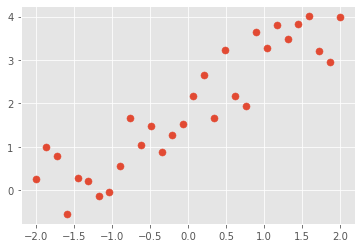

In [4]:
#================================
#Visualizing the data
#================================
x = data[:,0]
y = data[:,1]
plt.scatter(x, y, s=50)

In [5]:
# CONSTRUCT THE DESIGN MATRIX
X = np.column_stack([x**0,x])
X.shape

(30, 2)

### Implement gradient desdent
- Cost function 
\begin{equation}
L(X;\theta)=\dfrac{1}{m}\sum_{i=1}^{m}(y_i-\theta_0-\theta_1 x_i)^2=\dfrac{1}{m}||y-X\theta||^2
\end{equation}
- Gradient vector 
\begin{equation}
\nabla_\theta L(X;\theta)=\dfrac{2}{m}X^T \cdot(X\theta-y)
\end{equation}

In [6]:
def computeCost(X, y, theta):
       """
       Input
        X : design matrix
        y : the responses
        theta : initial guess

        Return
        loss : the loss evaluated at (t)
        grad : gradient vector of the loss evaluated at (t)

       """
       m = len(y)
       #IMPLEMENT THE LOSS GIVEN IN EQ 1

       loss = sum((np.dot(X,theta)-y)**2)/m    #YOU CODE HERE
       # IMPLEMENT THE GRADIENT GIVEN EQ 2

       grad = 2*np.dot(X.T,(np.dot(X,theta)-y))/m                        #YOUR CODE HERE
       return [loss, grad]

# initialize the weight
theta = np.zeros(X.shape[1])
# check your result
print('The initial loss value is ', computeCost(X, y, theta)[0])

The initial loss value is  5.4241690979099735


In [7]:
# learning rate
eta = 0.02
# number of iterations
num_iters = 300

In [8]:
def gradientDescent(X, y, theta, eta, num_iters):
    """
    Inputs:
    X : design matrix of the length of the training examples by the number of features
    y : vector of length size of the length of training examples
    theta : initial weights
    eta : learning rate
    num_iters : number of iterations
    
    Return
    lossVals : Values of the loss after each iteration
    thetaVals : Values of the weights after each iteration
    theta : the updated weights
    """
    lossVals = []
    thetaVals = []
    for i in range(num_iters):
        thetaVals.append(theta)
        loss, grad = computeCost(X, y, theta)
        # IMPLEMENT THE UPDATE

        theta = theta -eta*grad
        
        lossVals.append(loss)
    return [theta, lossVals, thetaVals]

In [9]:
#================================
# check minimum value using GD
#===============================
opt_theta_GD, loss_history, theta_history = gradientDescent(X, y, theta, eta, num_iters)
# Check your result
print('Your result is ', opt_theta_GD)

Your result is  [1.87269309 1.05597647]


Text(0.5, 0, 'Iteration')

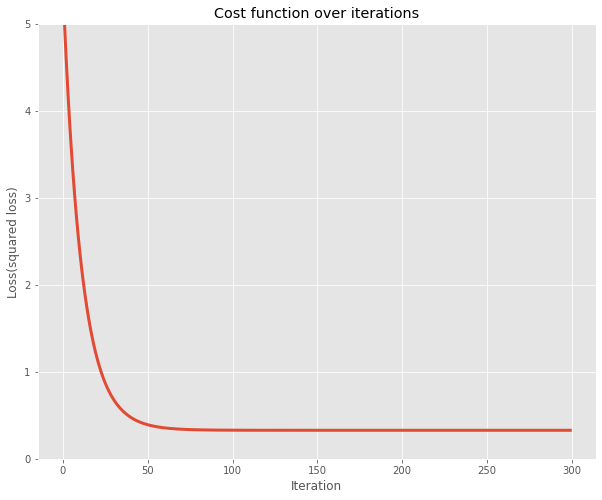

In [10]:
#===============================
# visualizing the loss function
#================================
plt.figure(figsize=(10,8))
plt.plot(loss_history, linewidth=3 )
plt.ylim((0,5))
plt.title('Cost function over iterations')
plt.ylabel('Loss(squared loss)')
plt.xlabel('Iteration')

In [11]:
loss_history[-1]

0.32783751483638507

## Visualizing the loss vs iteration for different learning rates

(0.0, 7.0)

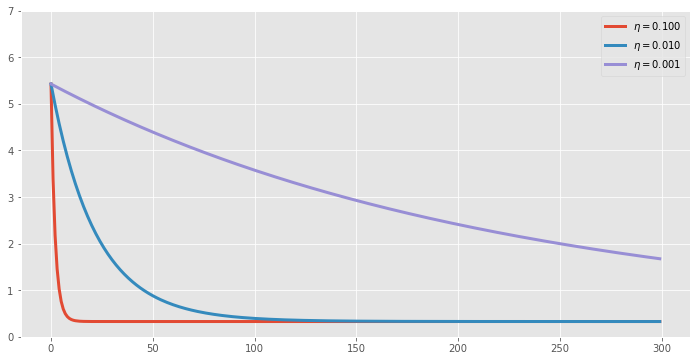

In [12]:
theta_list = [0.100,0.01,0.001]
fig = plt.figure(figsize=(12,6))
for eta in theta_list:
    theta1 = np.zeros(X.shape[1])
    opt_theta_GD, loss_history, theta_history = gradientDescent(X, y, theta1, eta, num_iters)
    plt.plot(loss_history, linewidth=3, label='$\eta=$%0.3f'%eta)

plt.legend()
plt.ylim((0,7))

#### What do we observe if we take a big value of the learning rate (for example $\eta=2$) ?

C:\Users\JORDAN LONTSI\AppData\Local\Temp\ipykernel_11724\2002958395.py:16: RuntimeWarning: overflow encountered in square
  loss = sum((np.dot(X,theta)-y)**2)/m    #YOU CODE HERE


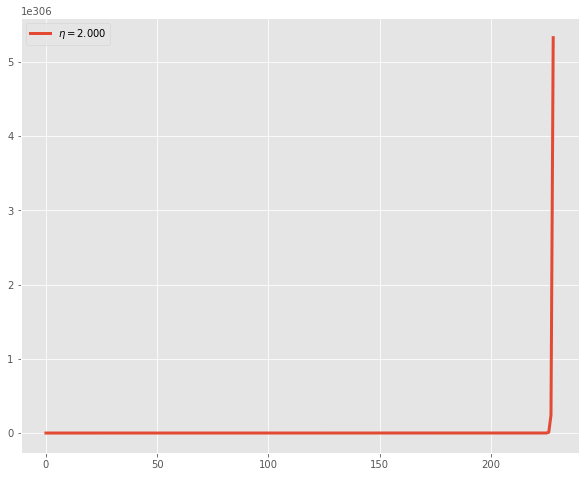

In [13]:
#visualisation of the loss function for eta = 2
eta_test = 2
_, loss_history_test, _= gradientDescent(X, y, theta1, eta_test, num_iters)

plt.figure(figsize=(10,8))
plt.plot(loss_history_test, linewidth=3, label='$\eta=$%0.3f'%eta_test)

plt.legend()
#plt.ylim((0,1000))

In [14]:
np.asarray(loss_history_test).min()

5.4241690979099735

In [15]:
from matplotlib import cm
npoints = 100
w0 = np.linspace(-5, 5, npoints)
w1 = np.linspace(-5, 5, npoints)

W0, W1 = np.meshgrid(w0, w1)
cost_vals = np.empty((npoints, npoints))
for i in range(npoints):
    cost_vals[i] = [computeCost(X, y, np.array(w))[0] for w in zip(W0[i],W1[i])]

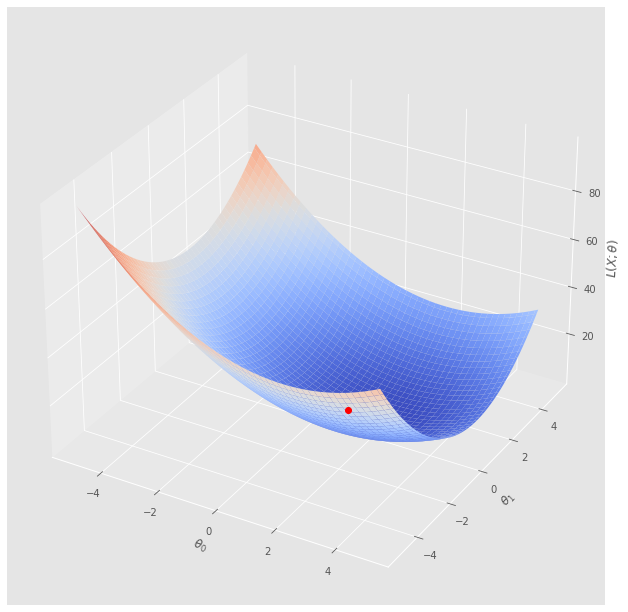

In [16]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (11,11))
ax.plot_surface(W0, W1, cost_vals, vmin=cost_vals.min() * 2, cmap=cm.coolwarm,linewidth=0.5)

ax.set(xlabel=r'$\theta_0$', ylabel=r'$\theta_1$', zlabel=r'$L(X;\theta)$')
ax.plot(opt_theta_GD[0], opt_theta_GD[1], computeCost(X, y, opt_theta_GD)[0], marker='o', color='r')
plt.show()

<a list of 9 text.Text objects>

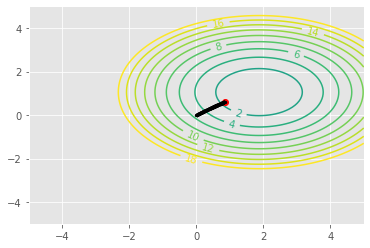

In [17]:
w = np.c_[theta_history]
fig2, ax2 = plt.subplots()

CS = ax2.contour(W0, W1, cost_vals, np.arange(-20, 20, 2))
ax2.plot(opt_theta_GD[0], opt_theta_GD[1], marker='o', color='r')
ax2.plot(w[:,0], w[:,1], 'kx-', markersize=2, mew=2)
plt.clabel(CS, inline=1, fontsize=10)




## Introduction to Pandas

In [18]:
#Installation

In [ ]:
pip install pandas

In [20]:
#Module importation
import pandas as pd

## Data description

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).
We will be working with the mat one.

In [21]:
#Importation of a DataFrame (as csv file)

df= pd.read_csv('student_mat.csv', delimiter = ';')

In [22]:
DF = df.copy()

### Data Exploration

In [23]:
#Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [24]:
#List the columns

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [25]:
#Print the whole DataFrame

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [26]:
#select a sample

df[:30]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [27]:
# Select specific features

df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'G1', 'G3']]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,G1,G3
0,GP,F,18,U,GT3,A,4,4,5,6
1,GP,F,17,U,GT3,T,1,1,5,6
2,GP,F,15,U,LE3,T,1,1,7,10
3,GP,F,15,U,GT3,T,4,2,15,15
4,GP,F,16,U,GT3,T,3,3,6,10
...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,9,9
391,MS,M,17,U,LE3,T,3,1,14,16
392,MS,M,21,R,GT3,T,1,1,10,7
393,MS,M,18,R,LE3,T,3,2,11,10


In [28]:
#Select a sample using a condition

df[df['G3']>10]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15
378,MS,F,18,U,GT3,T,3,3,other,other,...,4,1,3,1,2,1,0,15,15,15
380,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,3,2,4,1,4,2,4,15,14,14


In [29]:
#drop a column

df.drop(columns=['famsize'])

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,A,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,T,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,T,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,T,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


### Plotting and visualisation

<AxesSubplot:ylabel='Frequency'>

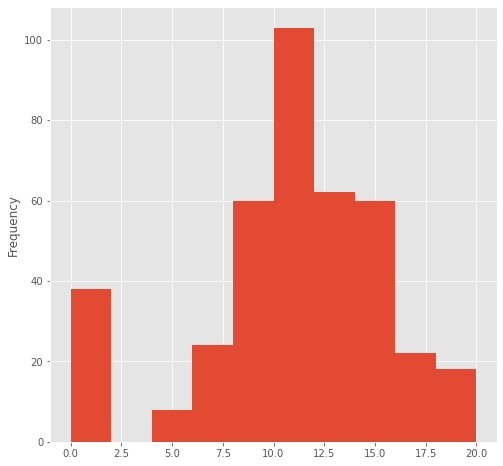

In [30]:
#Histogram

df['G3'].plot.hist(figsize=(8,8))

<AxesSubplot:xlabel='G2', ylabel='G3'>

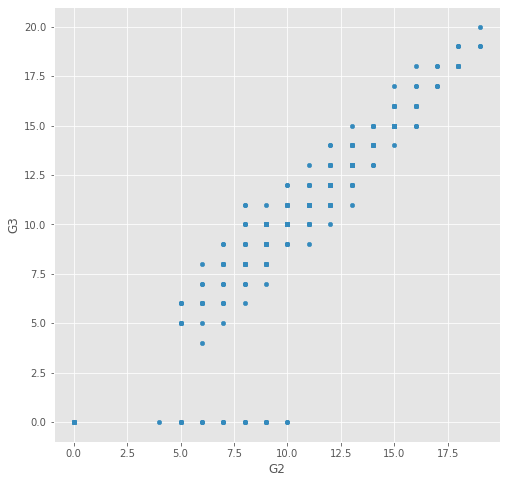

In [31]:
#Scatter plot

df.plot.scatter('G2', 'G3', figsize=(8,8))

In [32]:
df.plot.box(column=['G3'], by='sex', ,figsize=(8,8))

SyntaxError: invalid syntax (443215487.py, line 1)

---
# Congrats! That's it for this tutorial.

---
<h1>About the Authors:</h1> 

## Author 1
 
**Full Name**, Current position.
Email: myemail@gmail.com

## Author 2

**Full Name**, Current position.
Email: myemail@gmail.com


---
*This notebook was originally created for the [Accra WiMLDS chapter ](https://www.linkedin.com/company/98583062/admin/feed/posts/) Mathematics for ML & Data Science course 2024 and is published under [MIT license](https://choosealicense.com/licenses/mit/).*